<a href="https://colab.research.google.com/github/Uysim/on-time-flight-analysis/blob/master/on_time_flight_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# On Time Flight Analysis

In this notebook we analysis the flight data to pick an airline that more likely to arrive on time. 

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
!wget -q https://raw.githubusercontent.com/Uysim/on-time-flight-analysis/master/formatted_flights.csv -O formatted_flights.csv

In [0]:
flights = pd.read_csv("formatted_flights.csv")

In [0]:
flights.head(10)

,Unnamed: 0,arr_delay,name
0,0,11.0,United Air Lines Inc.
1,1,20.0,United Air Lines Inc.
2,2,33.0,American Airlines Inc.
3,3,-18.0,JetBlue Airways
4,4,-25.0,Delta Air Lines Inc.
5,5,12.0,United Air Lines Inc.
6,6,19.0,JetBlue Airways
7,7,-14.0,ExpressJet Airlines Inc.
8,8,-8.0,JetBlue Airways
9,9,8.0,American Airlines Inc.


In [0]:
flights["arr_delay"].min()

-60.0

In [0]:
flights["arr_delay"].max()

120.0

Turn out 

*   Minimum average delay is -60 minutes. Mean that flight arrived earlier for 60 minutes
*   Maximum average delay is 120 minutes. Mean that flight arrived late for 60 minutes




### Histogram

Text(0.5, 1.0, 'Histogram of Arrival Delays')

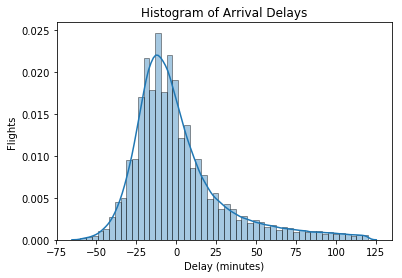

In [0]:
min_delay = -60
max_delay = 120
bins = int((max_delay - min_delay)/5) # group by each 5 minutes

ax = sns.distplot(flights['arr_delay'], hist=True, kde=True, hist_kws={'edgecolor':'black'})
ax.set(xlabel ='Delay (minutes)', ylabel ='Flights') 
plt.title('Histogram of Arrival Delays')

In [0]:
airline_names = flights["name"].unique()

We will plot each average delay of the airline and compare all of them
In order to help the insight we will calculate the mean and show them at the top.

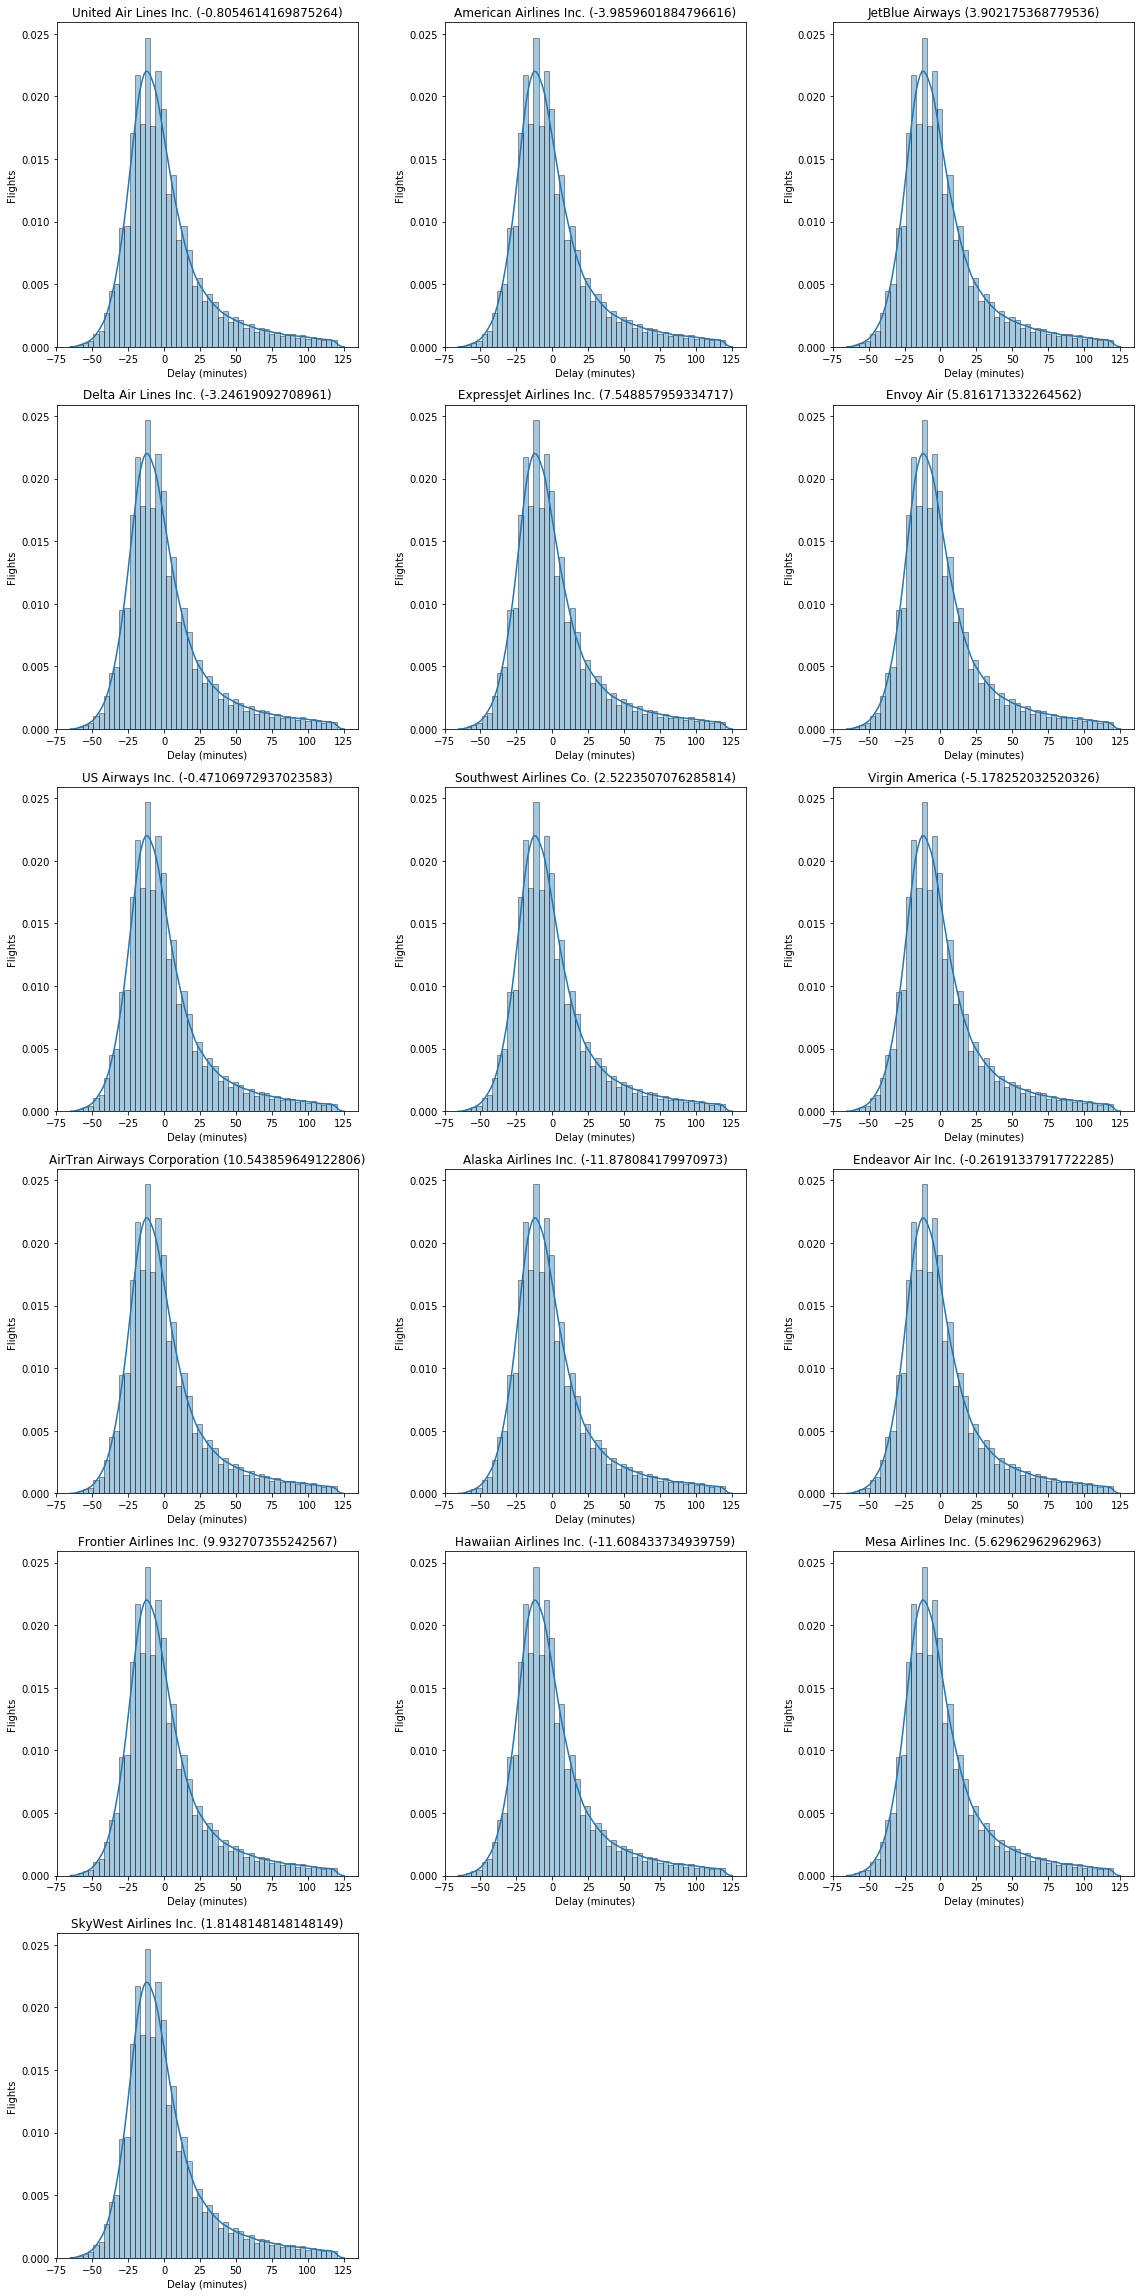

In [0]:
plt.figure(figsize=(16, 32))
for idx, airline in enumerate(airline_names):
  arr_delay = flights[flights["name"]==airline]["arr_delay"]
  plt.subplot(6, 3, idx+1)
  ax = sns.distplot(flights['arr_delay'], hist=True, kde=True, hist_kws={'edgecolor':'black'})
  ax.set(xlabel ='Delay (minutes)', ylabel ='Flights') 
  plt.title("{} ({})".format(airline, arr_delay.mean()))

plt.tight_layout()
plt.show()

From the histogram above we can assume that Hawaiian and Alaska Airlines are the best options. Most of their bars is behind the 0 point. And they have average mean -11 minutes.
It mean most likely they came earlier.

# Central Limit Theorem